# Utilities to get teh various layers from WMS getCapabilities

e.g. for seeing which layer provide what in terms of CRS, for inclusion in e.g. Leaflet, or Qgis, or whatever

see also https://practicaldatascience.co.uk/data-science/how-to-read-an-xml-feed-into-a-pandas-dataframe for generic xml parsing into pandas,or the analog1 repo for earlier use in 2022.

Also, owslib can help 

https://github.com/geopython/geopython-workshop/blob/master/workshop/jupyter/content/notebooks/10-remote-data.ipynb

## Search for projections

derived from https://stackoverflow.com/questions/76760107/extracting-crs-codes-from-pyproj-library

In [2]:
import pyproj

pyproj.get_authorities()

['EPSG', 'ESRI', 'IAU_2015', 'IGNF', 'NKG', 'OGC', 'PROJ']

In [3]:
import pyproj
import pandas as pd
# Create a list of CRS objects from the crs_info_list
crs_info_list = pyproj.database.query_crs_info(auth_name="IAU_2015", pj_types=None) 

# Create a pandas dataframe from the crs_list
crs_df = pd.DataFrame (data=crs_info_list, columns=["auth_name", "code", "name", "type", "deprecated", "area_of_use", "projection_method_name"])

# CRSInfo(auth_name='IAU_2015', code='1010', name='Sun (2015) - Sphere / Ocentric / Equirectangular, clon = 0', type=<PJType.PROJECTED_CRS: 'PROJECTED_CRS'>, deprecated=False, area_of_use=AreaOfUse(west=-180.0, south=-90.0, east=180.0, north=90.0, name='Not specified.'), projection_method_name='Equidistant Cylindrical')


In [4]:
crs_info_list[1]

CRSInfo(auth_name='IAU_2015', code='1010', name='Sun (2015) - Sphere / Ocentric / Equirectangular, clon = 0', type=<PJType.PROJECTED_CRS: 'PROJECTED_CRS'>, deprecated=False, area_of_use=AreaOfUse(west=-180.0, south=-90.0, east=180.0, north=90.0, name='Not specified.'), projection_method_name='Equidistant Cylindrical')

In [5]:
crs_df.set_index('code', inplace=True)

In [6]:
crs_df.head()

,auth_name,name,type,deprecated,area_of_use,projection_method_name
code,,,,,,
1000,IAU_2015,Sun (2015) - Sphere / Ocentric,PJType.GEOGRAPHIC_2D_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",None
1010,IAU_2015,Sun (2015) - Sphere / Ocentric / Equirectangul...,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Equidistant Cylindrical
1015,IAU_2015,Sun (2015) - Sphere / Ocentric / Equirectangul...,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Equidistant Cylindrical
1020,IAU_2015,"Sun (2015) - Sphere / Ocentric / Sinusoidal, c...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Sinusoidal
1025,IAU_2015,"Sun (2015) - Sphere / Ocentric / Sinusoidal, c...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Sinusoidal


In [7]:
def search_crs(name=""):
    import pyproj
    import pandas as pd
    crs_info_list = pyproj.database.query_crs_info(auth_name="IAU_2015", pj_types=None) 
    crs_df = pd.DataFrame (data=crs_info_list, columns=["auth_name", "code", "name", "type", "deprecated", "area_of_use", "projection_method_name"])
    bubu = crs_df.query ('name.str.contains (@name)') 
    return bubu

def search_code(code=""):
    import pyproj
    import pandas as pd
    crs_info_list = pyproj.database.query_crs_info(auth_name="IAU_2015", pj_types=None) 
    crs_df = pd.DataFrame (data=crs_info_list, columns=["auth_name", "code", "name", "type", "deprecated", "area_of_use", "projection_method_name"])
    bubu = crs_df.query ('code.str.contains (@code)') 
    return bubu

def search_iau(string=""):
    """
    Direct and inverse IAU search, Works also with substrings.
    
    Usage: e.g. 
    
        search_iau("Mars") # direct lookup
        
        search_iau("50255") # inverse lookup, by IAU 2015 CRS code
        
    If nothing is returned, there is no match
    """
    import pyproj
    import pandas as pd
    crs_info_list = pyproj.database.query_crs_info(auth_name="IAU_2015", pj_types=None)
    crs_df = pd.DataFrame (data=crs_info_list, columns=["auth_name", "code", "name", "type", "deprecated", "area_of_use", "projection_method_name"])
    
    if string.isnumeric():
        print("it's a IAU code (hopefully)")
        bubu = crs_df.query ('code.str.contains (@string)')
        if len(bubu) == 0:
            print("nothing returned, please check the spelling")
        return bubu

    if string.isalpha():
        print("it's a Solar System body name (hopefully)")
        bubu = crs_df.query ('name.str.contains (@string)')
        if len(bubu) == 0:
            return("nothing returned, please check the spelling")
        return bubu
        

In [8]:
search_iau("Io")

it's a Solar System body name (hopefully)


,auth_name,code,name,type,deprecated,area_of_use,projection_method_name
235,IAU_2015,50100,Io (2015) - Sphere / Ocentric,PJType.GEOGRAPHIC_2D_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",None
236,IAU_2015,50110,Io (2015) - Sphere / Ocentric / Equirectangula...,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Equidistant Cylindrical
237,IAU_2015,50115,Io (2015) - Sphere / Ocentric / Equirectangula...,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Equidistant Cylindrical
238,IAU_2015,50120,"Io (2015) - Sphere / Ocentric / Sinusoidal, cl...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Sinusoidal
239,IAU_2015,50125,"Io (2015) - Sphere / Ocentric / Sinusoidal, cl...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Sinusoidal
240,IAU_2015,50130,Io (2015) - Sphere / Ocentric / North Polar,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Polar Stereographic (variant A)
241,IAU_2015,50135,Io (2015) - Sphere / Ocentric / South Polar,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Polar Stereographic (variant A)
242,IAU_2015,50140,"Io (2015) - Sphere / Ocentric / Mollweide, clo...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Mollweide
243,IAU_2015,50145,"Io (2015) - Sphere / Ocentric / Mollweide, clo...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Mollweide
244,IAU_2015,50150,"Io (2015) - Sphere / Ocentric / Robinson, clon...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Robinson


In [9]:
search_crs("Mars").head()

,auth_name,code,name,type,deprecated,area_of_use,projection_method_name
181,IAU_2015,49900,Mars (2015) - Sphere / Ocentric,PJType.GEOGRAPHIC_2D_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",None
182,IAU_2015,49901,Mars (2015) / Ographic,PJType.GEOGRAPHIC_2D_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",None
183,IAU_2015,49902,Mars (2015) / Ocentric,PJType.GEODETIC_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",None
184,IAU_2015,49910,Mars (2015) - Sphere / Ocentric / Equirectangu...,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Equidistant Cylindrical
185,IAU_2015,49911,"Mars (2015) / Ographic / Equirectangular, clon...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Equidistant Cylindrical


In [10]:
search_code("49900")

,auth_name,code,name,type,deprecated,area_of_use,projection_method_name
181,IAU_2015,49900,Mars (2015) - Sphere / Ocentric,PJType.GEOGRAPHIC_2D_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",None


In [11]:
crs_df.index

Index(['1000', '1010', '1015', '1020', '1025', '1030', '1035', '1040', '1045',
       '1050',
       ...
       '951101045', '951101050', '951101055', '951101060', '951101065',
       '951101070', '951101075', '951101080', '951101085', '951101090'],
      dtype='object', name='code', length=2201)

In [12]:
# crs_df.query ('name.str.contains ("Venus")').query('projection_method_name.str.contain ("None")')
# crs_df.set_index("auth_name")

# to query with multiple conditions
crs_df.query ('name.str.contains ("Venus") & projection_method_name.str.contains ("")')

# to query with single condition
# crs_df.query ('name.str.contains ("Venus") & type.str.contains ("GEOGRAPHIC_2D_CRS")')

crs_df.query ('name.str.contains ("Venus")') 

# crs_df.query('type.str.contains ("GEOGRAPHIC_2D_CRS")')


,auth_name,name,type,deprecated,area_of_use,projection_method_name
code,,,,,,
29900,IAU_2015,Venus (2015) - Sphere / Ocentric,PJType.GEOGRAPHIC_2D_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",None
29910,IAU_2015,Venus (2015) - Sphere / Ocentric / Equirectang...,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Equidistant Cylindrical
29915,IAU_2015,Venus (2015) - Sphere / Ocentric / Equirectang...,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Equidistant Cylindrical
29920,IAU_2015,"Venus (2015) - Sphere / Ocentric / Sinusoidal,...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Sinusoidal
29925,IAU_2015,"Venus (2015) - Sphere / Ocentric / Sinusoidal,...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Sinusoidal
29930,IAU_2015,Venus (2015) - Sphere / Ocentric / North Polar,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Polar Stereographic (variant A)
29935,IAU_2015,Venus (2015) - Sphere / Ocentric / South Polar,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Polar Stereographic (variant A)
29940,IAU_2015,"Venus (2015) - Sphere / Ocentric / Mollweide, ...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Mollweide
29945,IAU_2015,"Venus (2015) - Sphere / Ocentric / Mollweide, ...",PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Mollweide


## General utilities to solve issues

e.g. with the pyenv+poetry+lab app setup

In [15]:
import sys
print(sys.version)
# print(sys.executable) #uncomment as needed

3.11.5 (main, Sep  4 2023, 14:17:17) [Clang 12.0.0 (clang-1200.0.26.2)]


## Import what is needed

e.g. pyproj > 3.6 is needed to get all the new IAU CRS, see also Hare and Malapert (2021) 

In [16]:
import pandas as pd
import requests
from owslib.wms import WebMapService
from owslib import crs
import xml.etree.ElementTree as et 
import geopandas as gpd
import pyproj
import io
from ipyleaflet import Map, WMSLayer, basemaps


In [17]:
pyproj.CRS('IAU_2015:19920')

<Projected CRS: IAU_2015:19920>
Name: Mercury (2015) - Sphere / Ocentric / Sinusoidal, clon = 0
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Sinusoidal, clon = 0
- method: Sinusoidal
Datum: Mercury (2015) - Sphere
- Ellipsoid: Mercury (2015) - Sphere
- Prime Meridian: Reference Meridian

In [18]:
pyproj.CRS('IAU_2015:50310')

<Projected CRS: IAU_2015:50310>
Name: Ganymede (2015) - Sphere / Ocentric / Equirectangular, clon = 0
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Equirectangular, clon = 0
- method: Equidistant Cylindrical
Datum: Ganymede (2015) - Sphere
- Ellipsoid: Ganymede (2015) - Sphere
- Prime Meridian: Reference Meridian

In [19]:
pyproj.CRS('IAU_2015:50310').to_proj4()

/Users/anrossi/Library/Caches/pypoetry/virtualenvs/crs-ws2024-cWTXXURG-py3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


'+proj=eqc +lat_ts=0 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +R=2631200 +units=m +no_defs +type=crs'

In [20]:
wms_url = 'http://webmap.lroc.asu.edu/?SERVICE=WMS&REQUEST=GetCapabilities'

asu_mars = 'http://jmars.mars.asu.edu/maps/getCapabilities.php?body=mars'
asu_mercury = 'http://jmars.mars.asu.edu/maps/getCapabilities.php?body=mercury'
asu_venus = 'http://jmars.mars.asu.edu/maps/getCapabilities.php?body=venus'
usgs_titan = 'https://planetarymaps.usgs.gov/cgi-bin/mapserv?map=/maps/saturn/titan_simp_cyl.map'
usgs_mercury = 'https://planetarymaps.usgs.gov/cgi-bin/mapserv?map=/maps/mercury/mercury_simp_cyl.map'
usgs_europa = 'https://planetarymaps.usgs.gov/cgi-bin/mapserv?map=/maps/jupiter/europa_simp_cyl.map'
usgs_ganymede = 'https://planetarymaps.usgs.gov/cgi-bin/mapserv?map=/maps/jupiter/ganymede_simp_cyl.map'
usgs_mars = 'https://planetarymaps.usgs.gov/cgi-bin/mapserv?map=/maps/mars/mars_simp_cyl_quads.map'
usgs_venus = 'https://planetarymaps.usgs.gov/cgi-bin/mapserv?map=/maps/venus/venus_simp_cyl.map'
explore = 'https://explore.jacobs-university.de/geoserver/ows?service=WMS&version=1.1.1&request=GetCapabilities'



In [25]:
wms_url = 'https://explore.jacobs-university.de/geoserver/ows?service=WMS&version=1.1.1&request=GetCapabilities'

wms_url = 'http://webmap.lroc.asu.edu/?SERVICE=WMS&REQUEST=GetCapabilities'

# wms_url = usgs_titan

In [26]:
wms = WebMapService(wms_url)

In [27]:
print(f"WMS version: {wms.identification.version}")
print(f"WMS title: {wms.identification.title}")
print(f"WMS abstract: {wms.identification.abstract}")
print(f"Provider name: {wms.provider.name}")

WMS version: 1.1.1
WMS title: Space Exploration Resources - Lunaserv
WMS abstract: None
Provider name: None


In [28]:
layer_names = list(wms.contents.keys())
print(layer_names[305])

ganymede_global


In [29]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

In [30]:
wms.getOperationByName('GetMap').methods


[{'type': 'Get', 'url': 'http://webmap.lroc.asu.edu/?'},
 {'type': 'Post', 'url': 'http://webmap.lroc.asu.edu/?'}]

In [31]:
wms.getOperationByName('GetMap').formatOptions


['image/png',
 'image/tiff',
 'image/jpeg',
 'image/gif',
 'image/pnm',
 'image/vicar',
 'application/x-cesium-terrain',
 'image/tiff; mode=32bit']

In [32]:
print(wms.getServiceXML())

b'<WMT_MS_Capabilities version="1.1.1">\n  <Service>\n    <Name>OGC:WMS</Name>\n    <Title>Space Exploration Resources - Lunaserv</Title>\n    <OnlineResource xmlns:xlink="http://www.w3.org/1999/xlink" xlink:href="http://webmap.lroc.asu.edu/?"/>\n    <ContactInformation>\n    </ContactInformation>\n    <Fees>None</Fees>\n    <AccessConstraints>None</AccessConstraints>\n  </Service>\n\n  <Capability>\n    <Request>\n      <GetCapabilities>\n        <Format>application/vnd.ogc.wms_xml</Format>\n        <DCPType>\n          <HTTP>\n            <Get><OnlineResource xmlns:xlink="http://www.w3.org/1999/xlink" xlink:href="http://webmap.lroc.asu.edu/?"/></Get>\n            <Post><OnlineResource xmlns:xlink="http://www.w3.org/1999/xlink" xlink:href="http://webmap.lroc.asu.edu/?"/></Post>\n          </HTTP>\n        </DCPType>\n      </GetCapabilities>\n      <GetMap>\n          <Format>image/png</Format>\n          <Format>image/tiff</Format>\n          <Format>image/jpeg</Format>\n          <F

In [35]:
img = wms.getmap(
    layers=['pluto_global'],
    size=[600, 400],
    srs="EPSG:4326",
    bbox=[1.0, 50.0, 10.0, 54.0],
    format="image/jpeg")

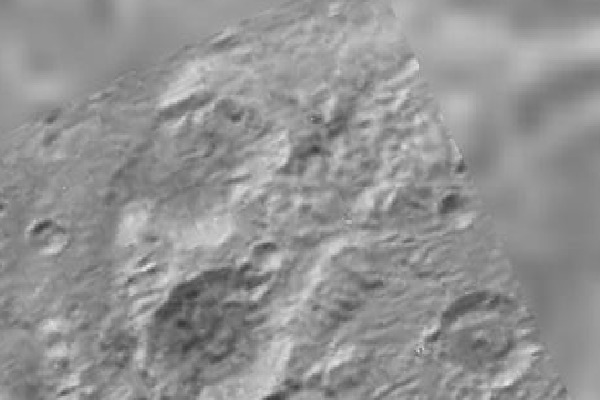

In [36]:
from IPython.display import Image
Image(img.read())

In [37]:
test_crs = wms['ganymede_global'].crsOptions

In [38]:
print(test_crs[305])

IAU2009:60163,9001,c_lon,c_lat,scale


## Including also proj4 in the data frame

In [40]:
import pandas as pd
import requests
from owslib.wms import WebMapService
import pyproj

# specify the URL of the lunaserv server
wms_url = 'http://webmap.lroc.asu.edu/?SERVICE=WMS&REQUEST=GetCapabilities'

# create a WebMapService object with version 1.1.1
wms = WebMapService(wms_url, version='1.1.1')

# get the list of layer names
layer_names = list(wms.contents)

# get the CRS options for each layer
crs_options = [wms[name].crsOptions for name in layer_names]

# create a dataframe with layer names and CRS options
df = pd.DataFrame({'Name': layer_names, 'CRS': crs_options})

# create empty lists for human-readable names and proj4 codes
names = []
proj4s = []

In [42]:
df.CRS.head()

0    [IAU2000:61713, IAU2000:90181,c_lon, IAU2009:6...
1    [IAU2000:61713, IAU2000:90181,c_lon, IAU2009:6...
2    [IAU2000:61713, IAU2000:90181,c_lon, IAU2009:6...
3    [IAU2000:61713, IAU2000:90181,c_lon, IAU2009:6...
4    [IAU2000:61713, IAU2000:90181,c_lon, IAU2009:6...
Name: CRS, dtype: object

## References

Hare, T. M., & Malapert, J. C. (2021). Standards Proposal for 2021 to Support Planetary Coordinate Reference Systems for Open Geospatial Web Services. LPI Contributions, 2549, 7012 - http://voparis-vespa-crs.obspm.fr:8080/web/ - http://www.opengis.net/def/crs/IAU/2015

## LINKS

https://github.com/geopython/geopython-workshop/blob/master/workshop/jupyter/content/notebooks/10-remote-data.ipynb

https://github.com/geopython/geopython-workshop/blob/master/workshop/jupyter/content/notebooks/03-spatial-reference-systems.ipynb

https://owslib.readthedocs.io/en/latest/usage.html#crs-handling

https://wiki.ivoa.net/internal/IVOA/InterOpMay2023SSIG/IVOA2023_SSIG_ogc_crs_v0.pdf

https://gis.stackexchange.com/questions/299567/reading-data-to-geopandas-using-wfs

https://owslib.readthedocs.io/en/latest/notebooks/wms.html

https://owslib.readthedocs.io/en/latest/usage.html#crs-handling

(see also the reference of the CRS repo material for the 2023 GMAP Winter School

https://gist.github.com/thareUSGS/79ae48425577c7cc82fd174955523878

https://gist.github.com/thareUSGS/8f5503e49adf508163faa8ec50aca1d0

https://gist.github.com/thareUSGS/8f29b897847a58ba2a0060cfd17adf83

http://planetarygis.blogspot.com/2014/09/tips-to-interact-with-astros-wms-maps.html

https://github.com/rsignell-usgs/notebook

https://pydov.readthedocs.io/en/stable/notebooks/spatial_querying.html

https://nasa-gibs.github.io/gibs-api-docs/python-usage/